# 과제: 100개의 임의 점 좌표에 대해 5-최근접 이웃 구하기 및 시각화 (p.100)

## 과제 설명

### 1. 목표: 100개의 임의의 2차원 좌표에 대해 각 점의 5-최근접 이웃을 찾아 시각화하는 프로그램을 작성.

### 2. 조건:
거리: 유클리드 거리 제곱을 사용하여 각 점 간의 거리를 계산.

출력: 각 점에 대해 가장 가까운 5개의 이웃 좌표를 출력.

시각화: 각 좌표와 해당 좌표에 가까운 5개의 이웃을 스캐터 플롯으로 시각화. (점마다 이웃 관계를 선으로 연결하여 표시)




3. 단계별 요구 사항

3.1 난수 좌표 생성: [0, 1) 범위에서 100개의 2차원 좌표를 생성.

In [ ]:
import numpy as np
x = np.random.rand(100) # x좌표 랜덤 생성
y = np.random.rand(100) # y좌표 랜덤 생성

x.shape, y.shape, x,y

((100,),
 (100,),
 array([0.09335266, 0.74686311, 0.36438317, 0.40299646, 0.14961152,
        0.2425021 , 0.76113151, 0.22040647, 0.45916063, 0.02004468,
        0.31033693, 0.71730629, 0.59751174, 0.69602983, 0.57716191,
        0.95657379, 0.46349143, 0.85091155, 0.79137328, 0.91158851,
        0.84442352, 0.44813379, 0.97402756, 0.67949056, 0.16538029,
        0.50926679, 0.87954637, 0.27357044, 0.44957983, 0.40094353,
        0.74257448, 0.65287188, 0.13269926, 0.87280923, 0.12822909,
        0.442076  , 0.23320536, 0.01097639, 0.27783849, 0.14853114,
        0.78691274, 0.00107476, 0.15974319, 0.8518092 , 0.26903432,
        0.74820924, 0.41391361, 0.94881366, 0.00400599, 0.90659161,
        0.06722332, 0.64409654, 0.91319124, 0.28220518, 0.18486425,
        0.56766314, 0.21679932, 0.10316522, 0.69234308, 0.6341867 ,
        0.28238409, 0.19249632, 0.57989559, 0.3032014 , 0.1763906 ,
        0.40090382, 0.04035685, 0.37289762, 0.48621846, 0.23158875,
        0.68363179, 0.55597724

In [ ]:
#NumPy를 쓰지 않음
points = list(zip(x, y))
points

[(np.float64(0.4339309160203201), np.float64(0.22378648714986993)),
 (np.float64(0.19418724472693194), np.float64(0.06666359891270479)),
 (np.float64(0.30884472581959077), np.float64(0.48584040385563254)),
 (np.float64(0.5031408392865564), np.float64(0.47461821769085943)),
 (np.float64(0.5168174178574524), np.float64(0.7600600328308131)),
 (np.float64(0.06029858920631148), np.float64(0.7619795461363175)),
 (np.float64(0.7680958277609946), np.float64(0.6413739335601655)),
 (np.float64(0.335047077468419), np.float64(0.49516469955488907)),
 (np.float64(0.9330486297333332), np.float64(0.03748824228741321)),
 (np.float64(0.10838307248398227), np.float64(0.8785652678372183)),
 (np.float64(0.7583099393100023), np.float64(0.657689097593208)),
 (np.float64(0.6643619635261392), np.float64(0.48984628640711236)),
 (np.float64(0.7059841292535421), np.float64(0.20288238703022232)),
 (np.float64(0.5945743357810389), np.float64(0.8360728101116958)),
 (np.float64(0.19777527073173473), np.float64(0.1248

In [4]:
points = np.concatenate([x[:,None], y[:, None]], axis=1)
points.shape

(100, 2)

In [5]:
import numpy as np

np.random.rand(100, 2).shape

(100, 2)

In [6]:
A = np.arange(1, 4)
A.shape, A

((3,), array([1, 2, 3]))

In [7]:
B = np.arange(1, 4)[:, None]
B.shape, B

((3, 1),
 array([[1],
        [2],
        [3]]))

In [8]:
# A = (1, 3)
# B = (3, 1)

A - B

array([[ 0,  1,  2],
       [-1,  0,  1],
       [-2, -1,  0]])

In [9]:
x = np.random.rand(100)
x.shape

(100,)

In [10]:
y = np.random.rand(100).reshape(100, 1)
y.shape

(100, 1)

In [11]:
def f(x, y):
    return np.sqrt((x - y)**2)

In [12]:
np.broadcast_to(A, (3, 3))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [13]:
np.broadcast_to(B, (3, 3))

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [14]:
points = np.random.rand(10, 2)

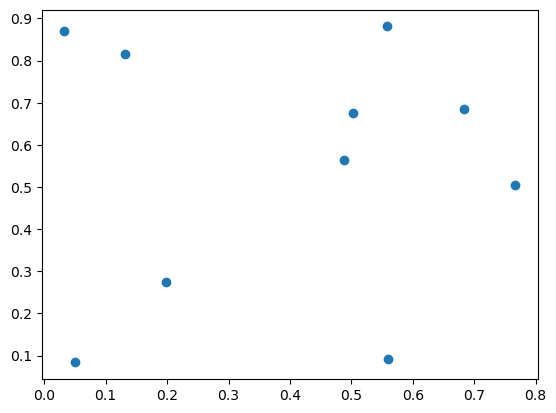

In [15]:
import matplotlib.pyplot as plt

plt.scatter(points[:,0], points[:,1])

3.2 거리 행렬 계산:

각 점 간의 유클리드 거리 제곱을 계산하여 100x100 크기의 거리 행렬을 생성.

In [38]:
points = np.random.rand(10, 2)
points[None, :, :].shape, points[:, None, :].shape

((1, 10, 2), (10, 1, 2))

In [53]:
points = np.random.rand(10, 2)
points.shape, points[:, None, :].shape

((10, 2), (10, 1, 2))

In [54]:
d = points - points[:, None, :]
d.shape

(10, 10, 2)

In [55]:
d = (points - points[:, None, :])
d.shape

(10, 10, 2)

In [59]:
d = np.sqrt(np.sum((points - points[:, None, :])**2, axis=2))
d

array([[0.        , 0.75316332, 0.2765868 , 0.39186239, 0.87784314,
        0.81765984, 0.31911266, 0.42075669, 0.50957857, 0.47028307],
       [0.75316332, 0.        , 0.50045135, 0.58289796, 0.14077547,
        0.31163876, 0.43902595, 1.1037008 , 0.54752868, 0.3557191 ],
       [0.2765868 , 0.50045135, 0.        , 0.20818768, 0.63485951,
        0.63810783, 0.07338973, 0.68469371, 0.29296156, 0.19396288],
       [0.39186239, 0.58289796, 0.20818768, 0.        , 0.72366142,
        0.79132781, 0.2641626 , 0.810551  , 0.12027908, 0.22825243],
       [0.87784314, 0.14077547, 0.63485951, 0.72366142, 0.        ,
        0.26890745, 0.57015167, 1.2077931 , 0.68563871, 0.49643626],
       [0.81765984, 0.31163876, 0.63810783, 0.79132781, 0.26890745,
        0.        , 0.56477692, 1.07101464, 0.79373336, 0.57433529],
       [0.31911266, 0.43902595, 0.07338973, 0.2641626 , 0.57015167,
        0.56477692, 0.        , 0.70834278, 0.32934045, 0.17534787],
       [0.42075669, 1.1037008 , 0.6846937

In [58]:
from sklearn.metrics import pairwise_distances

points = np.random.rand(10, 2)
pairwise_distances(points)

array([[0.        , 0.75316332, 0.2765868 , 0.39186239, 0.87784314,
        0.81765984, 0.31911266, 0.42075669, 0.50957857, 0.47028307],
       [0.75316332, 0.        , 0.50045135, 0.58289796, 0.14077547,
        0.31163876, 0.43902595, 1.1037008 , 0.54752868, 0.3557191 ],
       [0.2765868 , 0.50045135, 0.        , 0.20818768, 0.63485951,
        0.63810783, 0.07338973, 0.68469371, 0.29296156, 0.19396288],
       [0.39186239, 0.58289796, 0.20818768, 0.        , 0.72366142,
        0.79132781, 0.2641626 , 0.810551  , 0.12027908, 0.22825243],
       [0.87784314, 0.14077547, 0.63485951, 0.72366142, 0.        ,
        0.26890745, 0.57015167, 1.2077931 , 0.68563871, 0.49643626],
       [0.81765984, 0.31163876, 0.63810783, 0.79132781, 0.26890745,
        0.        , 0.56477692, 1.07101464, 0.79373336, 0.57433529],
       [0.31911266, 0.43902595, 0.07338973, 0.2641626 , 0.57015167,
        0.56477692, 0.        , 0.70834278, 0.32934045, 0.17534787],
       [0.42075669, 1.1037008 , 0.6846937

In [52]:
np.argsort(d)

array([[0, 5, 4, 1, 7, 6, 8, 9, 2, 3],
       [1, 5, 0, 8, 6, 4, 7, 3, 2, 9],
       [2, 9, 8, 1, 7, 3, 0, 5, 6, 4],
       [3, 8, 6, 1, 5, 2, 0, 9, 7, 4],
       [4, 0, 5, 7, 1, 9, 6, 8, 2, 3],
       [5, 0, 1, 4, 6, 7, 8, 3, 9, 2],
       [6, 3, 8, 5, 1, 0, 4, 2, 7, 9],
       [7, 9, 0, 4, 1, 5, 2, 8, 6, 3],
       [8, 3, 1, 6, 2, 5, 0, 9, 7, 4],
       [9, 2, 7, 1, 0, 8, 4, 5, 3, 6]], dtype=int64)

In [50]:
data = np.random.rand(10)
data

array([0.10747072, 0.53482865, 0.48899658, 0.73044657, 0.09488453,
       0.30155786, 0.50093485, 0.96834425, 0.77651748, 0.26665473])

In [51]:
np.argsort(data)

array([4, 0, 9, 5, 2, 6, 1, 3, 8, 7], dtype=int64)

3.3 5-최근접 이웃 찾기:
각 점에 대해 가장 가까운 5개의 점을 거리 순으로 정렬.
자기 자신을 제외하고 가장 가까운 5개의 이웃.

3.4 결과 출력:
각 점에 대해 가장 가까운 5개의 이웃의 좌표와 거리 제곱을 출력.



3.5 시각화:
matplotlib를 사용하여 각 점과 해당 점의 5-최근접 이웃을 플롯.
각 점은 scatter로 표시하고, 가까운 이웃과 연결하는 선을 추가하여 관계를 시각적으로 표현.

In [ ]:
#p.100 -> 나중에 수정하기
import numpy as np
data = np.random.randint(0,10,(5,2))
data

array([[7, 5],
       [6, 2],
       [2, 3],
       [4, 7],
       [8, 5]], dtype=int32)

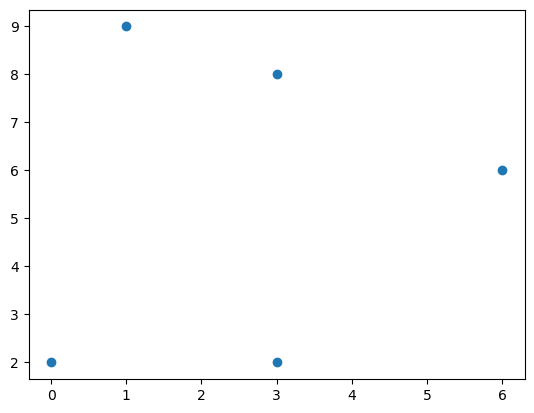

In [21]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1])

In [22]:
data.shape

(5, 2)

In [24]:
data[:,None,:].shape, data[None,:,:].shape

((5, 1, 2), (1, 5, 2))

In [ ]:
# 5*5 크기로 브로드캐스팅 -> 사이즈 만들고, 각 좌표끼리 뺄셈까지 상황
(data[:,None,:]-data[None,:,:]).shape

(5, 5, 2)

In [ ]:
# 거리 연산
np.sqrt((np.array([1,4])-np.array([2,2]))**2)

(2,)

In [37]:
# 거리 연산식을 적용
np.sqrt((data[:,None,:]-data[None,:,:])**2).shape

(5, 5, 2)

In [35]:
np.sum((np.sqrt((data[:,None,:]-data[None,:,:])**2)),axis=2)

array([[ 0.,  9.,  3.,  6.,  7.],
       [ 9.,  0.,  8.,  3.,  8.],
       [ 3.,  8.,  0.,  9., 10.],
       [ 6.,  3.,  9.,  0.,  5.],
       [ 7.,  8., 10.,  5.,  0.]])

In [38]:
# 정렬
dist = np.sum((np.sqrt((data[:,None,:]-data[None,:,:])**2)),axis=2)
np.sort(dist)

array([[ 0.,  3.,  6.,  7.,  9.],
       [ 0.,  3.,  8.,  8.,  9.],
       [ 0.,  3.,  8.,  9., 10.],
       [ 0.,  3.,  5.,  6.,  9.],
       [ 0.,  5.,  7.,  8., 10.]])